# Segmentación de triángulos

### Alumna: Salma Patricia Gutiérrez Rivera

__1.__ Segmentar las aristas de los triángulos. En los resultados, mostrar la imagen binaria de las aristas.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import math

In [2]:
triangulos = cv.imread("images/Triangulos.PNG", 0)

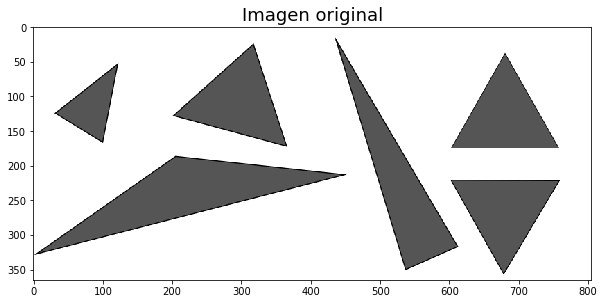

In [3]:
fig = plt.figure(figsize = (10, 5))
fig.add_subplot(1, 1, 1)
plt.imshow(triangulos, cmap = 'gray');
plt.title("Imagen original", size = 18);

No hay ruido en la imagen y hay tres intensidades bien distinguibles: la del fondo, la de los contornos de los triángulos y la de su relleno, por lo que creí que bastaba una umbralización doble para extraer los contornos. No funcionó.

Después, los extraje mediante erosión con un kernel 3x3. Funcionó, pero una línea se quedó sin detectar, así que usé un kernel 5x5.

In [117]:
bin_triang = np.where(triangulos < 170, 255, 0)

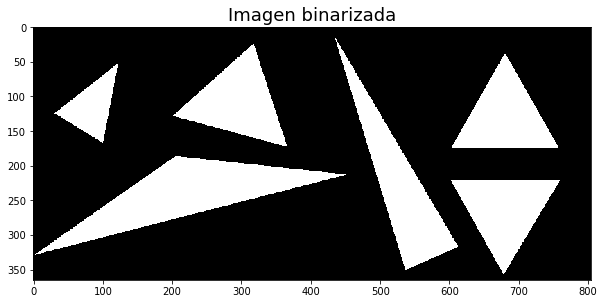

In [9]:
fig = plt.figure(figsize = (10, 5))
fig.add_subplot(1, 1, 1)
plt.imshow(bin_triang, cmap = 'gray');
plt.title("Imagen binarizada", size = 18);

In [49]:
padd_bin_triang = cv.copyMakeBorder(bin_triang, 5, 5, 5, 5, cv.BORDER_CONSTANT)

In [110]:
imgu8 = np.uint8(padd_bin_triang)
kernel3 = np.ones((3, 3), np.uint8)
erode3_triang = cv.erode(imgu8, kernel3, iterations = 1)
contor3 = imgu8 - erode3_triang

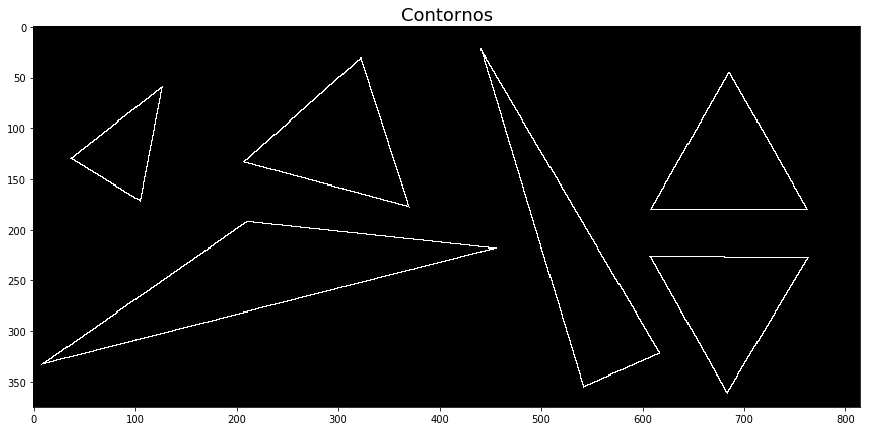

In [111]:
fig = plt.figure(figsize = (15, 7))
fig.add_subplot(1, 1, 1)
plt.imshow(contor3, cmap = 'gray');
plt.title("Contornos", size = 18);

__2.__ Encontrar los modelos de las rectas que forman cada arista. Para esto, solicite un umbral que elimine a las posibles aristas de longitud menor a dicho umbral. Los parámetros que debe encontrar de cada arista son $\theta$, $\rho$ y longitud. Hacer una tabla donde cada renglón sea una arista (identifíquelas con un número) y las columnas sean los parámetros indicados.

In [224]:
img_con_lineas = cv.cvtColor(contor3, cv.COLOR_GRAY2BGR)
lineas = cv.HoughLines(canny_edges, 1, np.pi / 180, 60, None, 0, 0)

for i in range(len(lineas)):
    rho = lineas[i][0][0]
    theta = lineas[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv.line(img_con_lineas, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
    
print(lineas.shape)

(50, 1, 2)


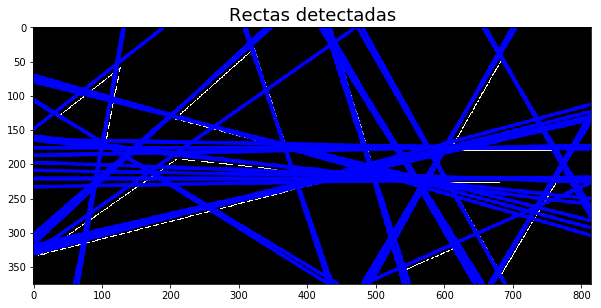

In [225]:
fig = plt.figure(figsize = (10, 5))
fig.add_subplot(1, 1, 1)
plt.imshow(img_con_lineas);
plt.title("Rectas detectadas", size = 18);

In [136]:
canny_edges = cv.Canny(contor3, 50, 200, None, 3)
img_con_lineas = cv.cvtColor(canny_edges, cv.COLOR_GRAY2BGR)
img_con_lineasp = np.copy(img_con_lineas)
lineas_p = cv.HoughLinesP(canny_edges, 1, np.pi / 180, 50, None, 50, 10)

for i in range(len(lineas_p)):
    l = lineas_p[i][0]
    cv.line(img_con_lineasp, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

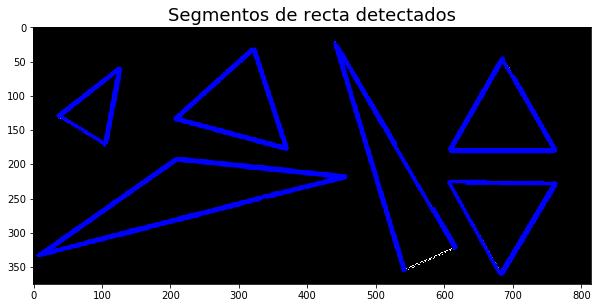

In [137]:
fig = plt.figure(figsize = (10, 5))
fig.add_subplot(1, 1, 1)
plt.imshow(img_con_lineasp);
plt.title("Segmentos de recta detectados", size = 18);